In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
os.chdir('..')

In [3]:
pd.options.display.max_columns = None

In [4]:
%%time

articles_df = pd.read_csv('data/articles.csv')
print(articles_df.shape)

customers_df = pd.read_csv('data/customers.csv')
print(customers_df.shape)

sample_submission_df = pd.read_csv('data/sample_submission.csv')
print(sample_submission_df.shape)

transactions_train_df = pd.read_csv('data/transactions_train.csv')
print(transactions_train_df.shape)

(105542, 25)
(1371980, 7)
(1371980, 2)
(30647963, 5)
CPU times: user 25 s, sys: 6.17 s, total: 31.2 s
Wall time: 32 s


In [5]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
sample_submission_df.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [8]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001.0,0.050831,2.0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023.0,0.030492,2.0
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004.0,0.015237,2.0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003.0,0.016932,2.0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004.0,0.016932,2.0


### Random recommendations submission

In [9]:
articles_df.shape[0], articles_df['article_id'].nunique()

(105542, 105542)

In [10]:
print(sample_submission_df.shape)
sample_submission_df.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [13]:
n_customers = sample_submission_df.shape[0]
n_customers

1371980

In [17]:
np.random.seed(3)
predictions = np.random.choice(articles_df['article_id'].unique(), size=(n_customers, 12))
predictions

array([[764285002, 750260003, 787716001, ..., 816506001, 868399001,
        678553003],
       [605842008, 697564057, 938624001, ..., 586362001, 458925003,
        734196001],
       [886800001, 753692018, 845610001, ..., 768205003, 485751003,
        627572011],
       ...,
       [568415001, 745293018, 551174005, ..., 567874006, 521508001,
        565320023],
       [824497001, 795338003, 679854018, ..., 861133001, 713997065,
        556436001],
       [484644001, 453765005, 739612001, ..., 573547001, 882893001,
        903590001]])

In [19]:
random_submission = pd.DataFrame(predictions)
random_submission['customer_id'] = sample_submission_df['customer_id']
random_submission.head()

,0,1,2,3,4,5,6,7,8,9,10,11,customer_id
0,764285002,750260003,787716001,721884001,690936023,846356002,926266001,612510001,546733001,816506001,868399001,678553003,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
1,605842008,697564057,938624001,736767003,743400001,725358005,740415001,749562003,766503001,586362001,458925003,734196001,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...
2,886800001,753692018,845610001,699063001,519975008,794205001,757674002,747720009,608069008,768205003,485751003,627572011,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
3,766595005,874224005,689139002,910177001,784280001,633150010,787260004,516777001,600753001,685814063,589808001,768858001,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...
4,565935002,497225005,637538003,708740017,743642004,708443002,772448004,828855002,810710005,526841003,774543005,575839001,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...


In [22]:
random_submission['prediction'] = random_submission[list(range(12))].astype(str).agg(' '.join, axis=1)

In [23]:
random_submission.drop(columns=list(range(12)), inplace=True)

In [24]:
random_submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,764285002 750260003 787716001 721884001 690936...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,605842008 697564057 938624001 736767003 743400...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,886800001 753692018 845610001 699063001 519975...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,766595005 874224005 689139002 910177001 784280...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,565935002 497225005 637538003 708740017 743642...


In [25]:
random_submission['prediction'][0]

'764285002 750260003 787716001 721884001 690936023 846356002 926266001 612510001 546733001 816506001 868399001 678553003'

In [26]:
random_submission.to_csv('submissions/20220226-random-rec.csv', index=False)

Scored 0! :)

### Exploration

In [27]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001.0,0.050831,2.0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023.0,0.030492,2.0
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004.0,0.015237,2.0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003.0,0.016932,2.0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004.0,0.016932,2.0


In [28]:
transactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30647963 entries, 0 to 30647962
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        float64
 3   price             float64
 4   sales_channel_id  float64
dtypes: float64(3), object(2)
memory usage: 1.1+ GB


In [29]:
transactions_train_df['t_dat'] = pd.to_datetime(transactions_train_df['t_dat'])

What period were the transactions made in?

In [30]:
transactions_train_df['t_dat'].describe()

/var/folders/y7/s4mqr2gn1xs617jmcj6fc_ph0000gn/T/ipykernel_1820/385947481.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_train_df['t_dat'].describe()


count                30647963
unique                    704
top       2019-09-28 00:00:00
freq                   198622
first     2018-09-20 00:00:00
last      2020-08-23 00:00:00
Name: t_dat, dtype: object

Number of purchases by each customer over the period

In [35]:
%%time
purchases_per_customer = transactions_train_df.groupby('customer_id')['article_id'].count().values

CPU times: user 8.18 s, sys: 712 ms, total: 8.89 s
Wall time: 9.27 s


In [40]:
purchases_per_customer.mean(), purchases_per_customer.min(), purchases_per_customer.max()

(22.910784034494796, 0, 1844)

Total purchases per week

In [44]:
transactions_train_df['t_dat_week'] = transactions_train_df['t_dat'].dt.isocalendar().week
transactions_train_df['t_dat_year'] = transactions_train_df['t_dat'].dt.isocalendar().year

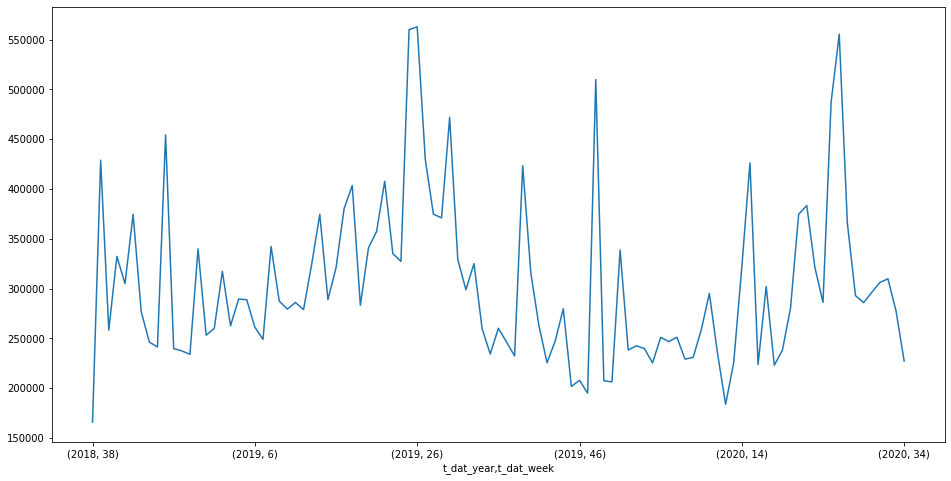

In [52]:
plt.figure(figsize=(16, 8))
transactions_train_df.groupby(['t_dat_year', 't_dat_week'])['customer_id'].count().plot()
plt.show()

Most common purchases

In [56]:
top_10 = transactions_train_df.groupby('article_id')['customer_id'].count().sort_values(ascending=False).head(10)
top_10

article_id
706016001.0    47829
706016002.0    34054
372860001.0    30577
610776002.0    28995
759871002.0    26134
464297007.0    24627
372860002.0    23272
399223001.0    22016
610776001.0    21771
720125001.0    20698
Name: customer_id, dtype: int64

In [59]:
articles_df[articles_df['article_id'].isin(top_10.index)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1713,372860001,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3611,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
1714,372860002,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,10,White,3,Light,9,White,3611,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
2236,399223001,399223,Curvy Jeggings HW Ankle,272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,1772,Denim Trousers,D,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,"Jeggings in washed, superstretch denim with a ..."
3711,464297007,464297,Greta Thong Mynta Low 3p,286,Underwear bottom,Underwear,1010014,Placement print,9,Black,4,Dark,5,Black,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Thong briefs in cotton jersey with a wide lace...
24836,610776001,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
24837,610776002,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
53893,706016002,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,Light Blue,3,Light,2,Blue,1747,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
58491,720125001,720125,SUPREME RW tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,8310,Ladies Sport Bottoms,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...
70221,759871002,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,3936,EQ Divided Basics,D,Divided,2,Divided,80,Divided Complements Other,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."


How many customers which we are predicting for are already in the training data?

In [60]:
transactions_train_df['customer_id'].nunique()

1337709

In [61]:
sample_submission_df['customer_id'].nunique()

1371980

In [62]:
# Number in submission set but not in training
len(
    set(sample_submission_df['customer_id'].unique()) - 
    set(transactions_train_df['customer_id'].unique())
)

34272

In [63]:
34272 / 1371980

0.024979955976034637

In [64]:
# Number in training set but not in submission
len(
    set(transactions_train_df['customer_id'].unique()) - 
    set(sample_submission_df['customer_id'].unique())
)

1